# QU Datathon Project
###  R. Ding, D. Jiao, X. Li

# Part I: Data Exploration

In this part, we made data visualization to get a general exploration about the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [4]:
df = pd.read_csv('btc_usd.csv')

There are seven columns: index, id, datetime, type, quantity, price, and total. We were intended to make price predicton and construct a strategy based on the quantity and price.

One particular thing to notice is that there could be more than one order posted onto the trading system, so we need to clean this data by constructing an orderbook. For instance, if one bid can be matched with one previous ask, we'll "merge" them.

In [8]:
df.head(50)

,Unnamed: 0,id,datetime,type,quantity,price,total
0,0,148668314,2018-01-01 00:00:01,sell,0.100000,13763.0,1376.300000
1,1,148668317,2018-01-01 00:00:01,buy,0.010000,13766.0,137.660000
2,2,148668334,2018-01-01 00:00:02,buy,0.105929,13767.0,1458.325094
3,3,148668333,2018-01-01 00:00:02,buy,0.244811,13766.0,3370.068777
4,4,148668332,2018-01-01 00:00:02,buy,0.025234,13766.0,347.375374
5,5,148668345,2018-01-01 00:00:02,buy,0.203304,13765.0,2798.475843
6,6,148668344,2018-01-01 00:00:02,buy,0.015056,13765.0,207.245840
7,7,148668343,2018-01-01 00:00:02,buy,0.300000,13765.0,4129.500000
8,8,148668348,2018-01-01 00:00:03,buy,0.146274,13765.0,2013.461610
9,9,148668362,2018-01-01 00:00:03,sell,0.002196,13763.0,30.218043


<Figure size 1080x1080 with 0 Axes>

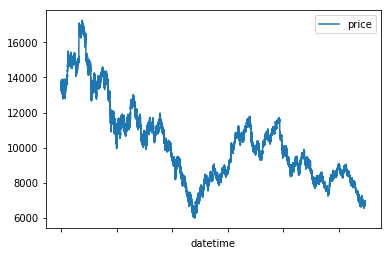

In [7]:
plt.figure(figsize=(15,15))
df.plot('datetime','price')

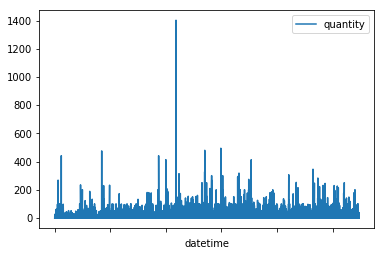

In [39]:
plt.figure(figsize=(15,15))
df.plot('datetime','quantity')

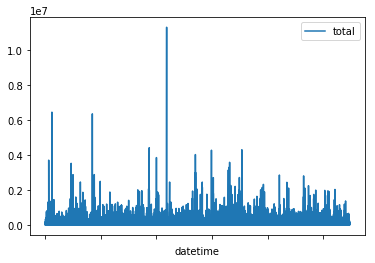

In [45]:
df.plot('datetime','total')

Some Observations:
1. The dataset contains one entry for every order placed, but these orders maynot be executed if there are no suitable opposite side orders to match it.
2. For some seconds there may not be any orders placed; for some minutes there may not be any trades happenning.
3. The price in the dataset may not be the real trading price of the bid/ask. We need to recalculate a weighted average for per second price series.